In [202]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [207]:
X = np.arange(0,5,0.1)

In [208]:
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

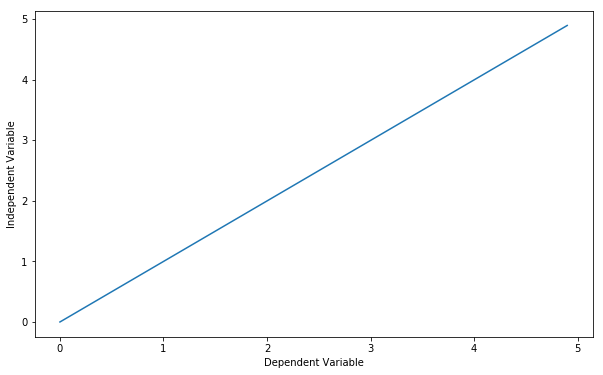

In [209]:
a=1
b=0

Y=a*X +b

plt.plot(X,Y)
plt.xlabel("Dependent Variable")
plt.ylabel("Independent Variable")

plt.show()

In [206]:
x_data = np.random.rand(100).astype(np.float32)

In [201]:
y_data = x_data *3 +2

y_data = np.vectorize(lambda y:y + np.random.normal(0.0,0.1))(y_data)

In [180]:
a = tf.Variable(1.0)
b = tf.Variable(0.1)
y = a*x_data+b

In [181]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [182]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [183]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [184]:
train_data = []
for step in range(100):
    evals = session.run([train,a,b])[1:]
    if (step%5==0):
        print(step, evals)
        train_data.append(evals)

[2.6457944, 3.0226455]
[2.5039873, 2.27418]
[2.6539621, 2.1942825]
[2.763553, 2.1349387]
[2.8439295, 2.091416]
[2.9028792, 2.0594954]
[2.946114, 2.0360844]
[2.9778235, 2.0189145]
[3.0010798, 2.0063214]
[3.0181365, 1.9970855]
[3.0306463, 1.9903116]
[3.0398211, 1.9853436]
[3.04655, 1.9817]
[3.051485, 1.9790276]
[3.0551047, 1.9770677]
[3.057759, 1.9756303]
[3.059706, 1.9745761]
[3.061134, 1.9738028]
[3.0621815, 1.9732357]
[3.0629497, 1.9728197]


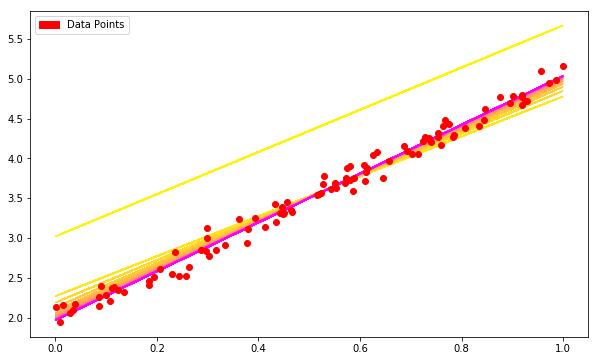

In [185]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

In [190]:
session.close()

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

/Users/Dipesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tensorflow graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# set model weights
W = tf.Variable(np.random.randn(), name ="weight")
b = tf.Variable(np.random.randn(), name = "bias")

In [6]:
# construct a linear model
pred = tf.add(tf.multiply(X, W),b)

In [7]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# initialize the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.541268647 W= 0.63034767 b= -1.9376508
Epoch: 0100 cost= 0.487653971 W= 0.6077027 b= -1.774744
Epoch: 0150 cost= 0.440228373 W= 0.586404 b= -1.6215241
Epoch: 0200 cost= 0.398278117 W= 0.56637233 b= -1.4774171
Epoch: 0250 cost= 0.361171484 W= 0.54753196 b= -1.3418821
Epoch: 0300 cost= 0.328348219 W= 0.52981204 b= -1.2144053
Epoch: 0350 cost= 0.299315393 W= 0.51314634 b= -1.094513
Epoch: 0400 cost= 0.273634344 W= 0.49747148 b= -0.9817497
Epoch: 0450 cost= 0.250918597 W= 0.48272905 b= -0.87569356
Epoch: 0500 cost= 0.230825678 W= 0.4688634 b= -0.7759447
Epoch: 0550 cost= 0.213053122 W= 0.45582244 b= -0.68212944
Epoch: 0600 cost= 0.197332546 W= 0.44355705 b= -0.5938926
Epoch: 0650 cost= 0.183427557 W= 0.43202123 b= -0.51090467
Epoch: 0700 cost= 0.171128318 W= 0.4211715 b= -0.43285227
Epoch: 0750 cost= 0.160249367 W= 0.41096687 b= -0.35944137
Epoch: 0800 cost= 0.150626794 W= 0.40136912 b= -0.2903963
Epoch: 0850 cost= 0.142115638 W= 0.3923423 b= -0.22545809
Epoch: 0900 cost

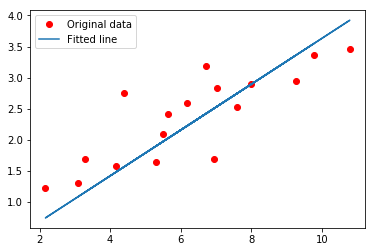

In [9]:
# start
with tf.Session() as sess:
    sess.run(init)
    
    #fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
